In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv


In [2]:
df = pd.read_csv('/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


# 1. Explore trend over year for each genre: 

**1.1 Number of best-selling books in each genre each year: **

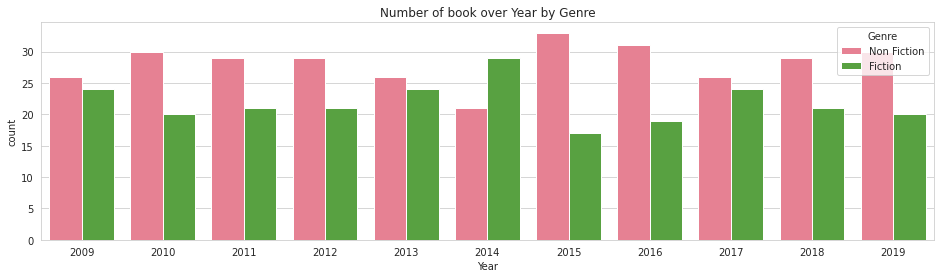

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(16,4))
sns.set_style('whitegrid')
sns.set_palette('husl', 3)

sns.countplot(x='Year', data=df, hue='Genre')

plt.title('Number of book over Year by Genre')
plt.show()


**1.2 Averaged Price, Reviews and User Rating over Year by Genre**

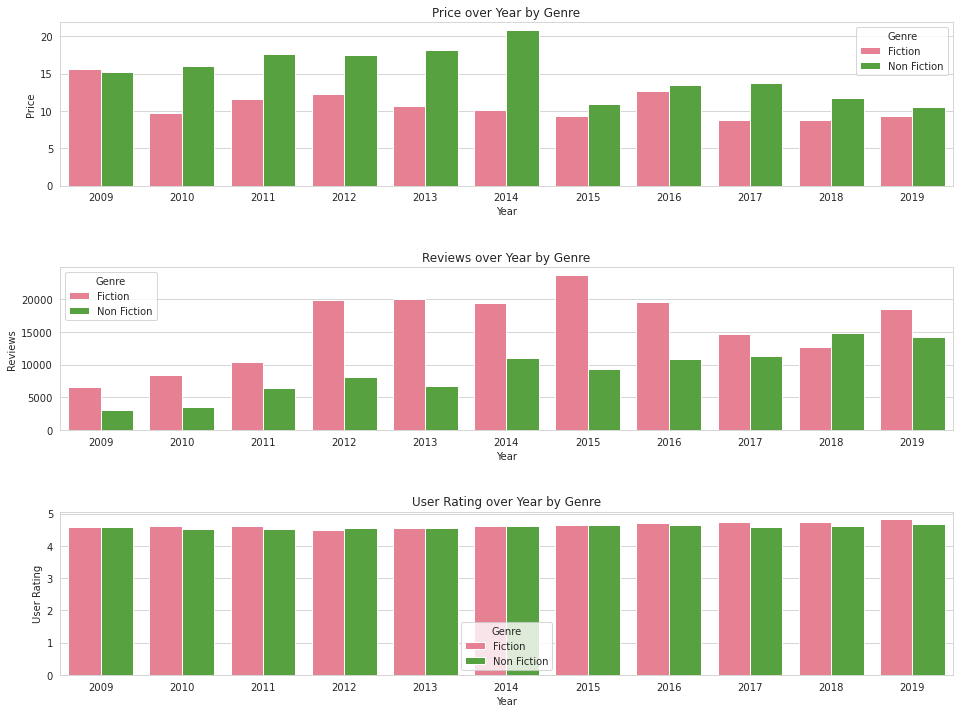

In [5]:
fig = plt.figure(figsize=(16,12))
gs = fig.add_gridspec(3, 1)

var_list = ['Price', 'Reviews', 'User Rating']

for i, var in enumerate(var_list): 
    df_sub = pd.DataFrame(df.groupby(['Year', 'Genre'])[var].mean()).reset_index()
    ax = fig.add_subplot(gs[i,0])
    fig.subplots_adjust(hspace = 0.5)
    sns.barplot(x='Year', y=df_sub[var], hue='Genre', data=df_sub, ax=ax)
    ax.set_title(str(var)+' over Year by Genre')
    
plt.show()

# 2. Analyze Variables by Author
2.1 Construct author table

In [6]:
df.set_index('Author', inplace=True)
df.drop_duplicates('Name', keep='last', inplace=True)
df.index

Index(['JJ Smith', 'Stephen King', 'Jordan B. Peterson', 'George Orwell',
       'National Geographic Kids', 'George R. R. Martin',
       'George R. R. Martin', 'Amor Towles', 'James Comey', 'Fredrik Backman',
       ...
       'Paul Kalanithi', 'Delia Owens', 'Maurice Sendak',
       'The Staff of The Late Show with
', 'Cheryl Strayed', 'Ken Follett',
       'Geneen Roth', 'R. J. Palacio', 'Jeff Kinney', 'Jen Sincero'],
      dtype='object', name='Author', length=351)

In [7]:
W_Rating = []
Book_Count = []

for author in df.index: 
    total_reviews = df.loc[author]['Reviews'].sum()
    ps_rating= (df.loc[author]['Reviews']*df.loc[author]['User Rating']).sum()
    W_Rating.append(ps_rating/total_reviews)
    
len(W_Rating)

351

In [8]:
df['W_Rating'] = W_Rating
df.reset_index()
df.head()

,Name,User Rating,Reviews,Price,Year,Genre,W_Rating
Author,,,,,,,
JJ Smith,10-Day Green Smoothie Cleanse,4.7,17350,8,2016,Non Fiction,4.700000
Stephen King,11/22/63: A Novel,4.6,2052,22,2011,Fiction,4.568954
Jordan B. Peterson,12 Rules for Life: An Antidote to Chaos,4.7,18979,15,2018,Non Fiction,4.700000
George Orwell,1984 (Signet Classics),4.7,21424,6,2017,Fiction,4.700000
National Geographic Kids,"5,000 Awesome Facts (About Everything!) (Natio...",4.8,7665,12,2019,Non Fiction,4.800000


In [9]:
#Define function to count number of books an author has in best-selling list:
def count(list):
    a = list.value_counts()
    return len(a)

df_author = pd.DataFrame(pd.pivot_table(data=df, values=['W_Rating','Reviews', 'Price', 'Name'],index='Author', aggfunc={'W_Rating':np.mean, 'Reviews':np.sum, 'Price': np.mean, 'Name':count}))
df_author = df_author.reset_index()
df_author['Name']

0      1
1      1
2      1
3      1
4      1
      ..
243    2
244    1
245    1
246    1
247    2
Name: Name, Length: 248, dtype: int64

Q1: How many books do the best-selling authors have?

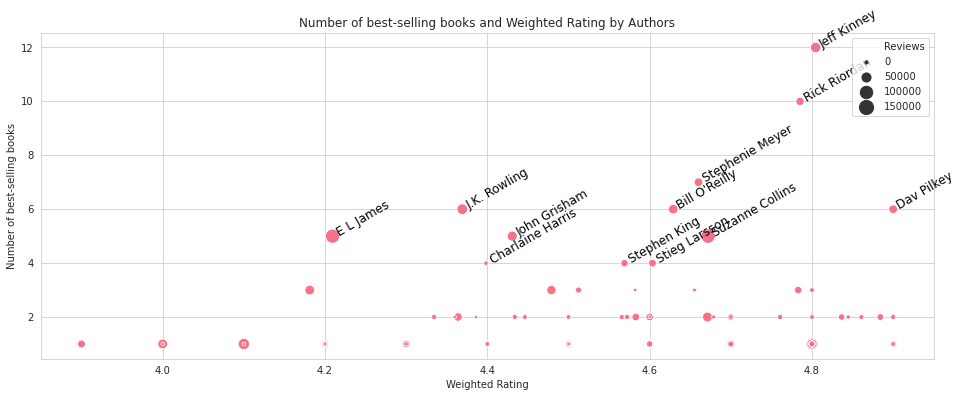

In [10]:
plt.figure(figsize=(16,6))

#Draw scatter plot:
ax = sns.scatterplot(x='W_Rating', y='Name', size='Reviews', sizes = (10, 200), data=df_author)

#Annotate:
for line in range(0,df_author.shape[0]):
     if df_author.Name[line] >= 4:
            ax.text(df_author.W_Rating[line]+0.002, df_author.Name[line], df_author.Author[line], horizontalalignment='left', size=12, color='black', weight='light', rotation=30)
    
plt.xlabel('Weighted Rating')
plt.ylabel('Number of best-selling books')        
plt.title('Number of best-selling books and Weighted Rating by Authors')
plt.show()

List of authors with at least 3 best-selling books:

In [11]:
df_author[df_author['Name']>=3].sort_values('Name', ascending=False)

,Author,Name,Price,Reviews,W_Rating
120,Jeff Kinney,12,9.250000,67482,4.804499
197,Rick Riordan,10,10.200000,39541,4.785243
221,Stephenie Meyer,7,19.857143,44058,4.660118
113,J.K. Rowling,6,20.166667,70535,4.369130
27,Bill O'Reilly,6,10.666667,54445,4.628989
58,Dav Pilkey,6,6.666667,44261,4.900000
76,E L James,5,15.600000,130746,4.209276
129,John Grisham,5,16.200000,60961,4.430687
226,Suzanne Collins,5,14.200000,130548,4.672016
37,Charlaine Harris,4,10.250000,6532,4.398301


In [12]:
df_author[df_author['Name']>=3].count()

Author      19
Name        19
Price       19
Reviews     19
W_Rating    19
dtype: int64

In [13]:
df_author['Author'].nunique()

248

# 3. Variable distributions

****Explore the distribution of Price

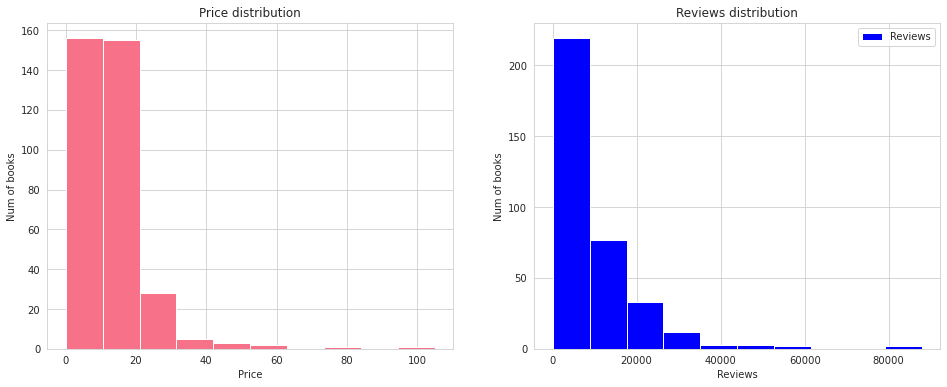

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))

axs[0].hist(x='Price', bins=10, data=df)
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Num of books')
axs[0].set_title('Price distribution')

axs[1].hist(x='Reviews', bins=10, data=df, color='b')
axs[1].set_xlabel('Reviews')
axs[1].set_ylabel('Num of books')
axs[1].set_title('Reviews distribution')

plt.legend()
plt.show()

# 4. Exploring Relationships between Variables accross the data set

****Relationship between Reviews and User Rating, compared between Genre:

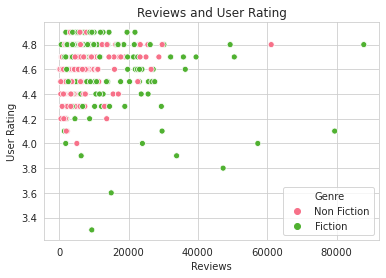

In [15]:
sns.scatterplot(x='Reviews', y='User Rating', hue='Genre', data=df)

plt.title('Reviews and User Rating')
plt.show()

**** Explore the relationship between Price and User Rating, compared between Genre:

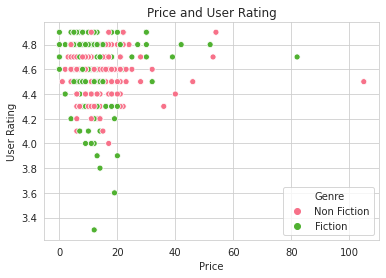

In [16]:
sns.scatterplot(x='Price', y='User Rating', hue='Genre', data=df)

plt.title('Price and User Rating')
plt.show()

# 5. Exploring Relationships between Variables when grouped by Author

****ax1: Explore the relationship between total reviews an author has and the average user rating for that author.

****ax2: Explore the relationship between average price of an author's best-selling books and the average user rating for that author.

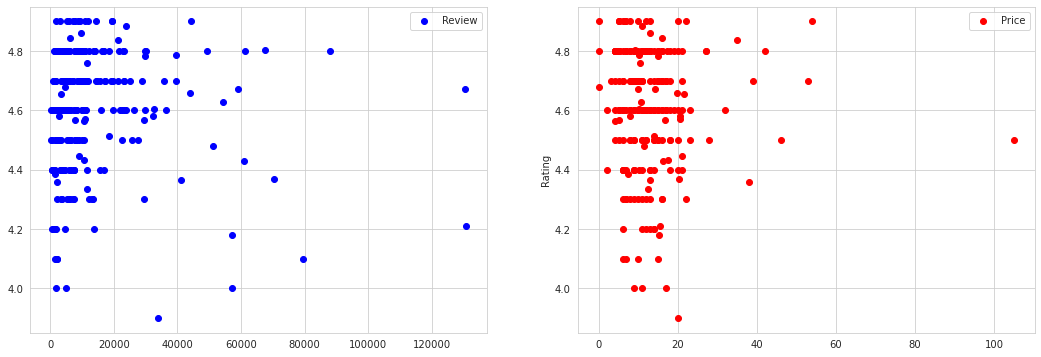

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18, 6))

ax1.scatter(x='Reviews', y='W_Rating', color = 'b', data=df_author, label='Review')
ax1.legend()
ax2.scatter(x='Price', y='W_Rating', color = 'r', data=df_author, label='Price')
ax2.legend()
plt.ylabel('Rating')
plt.show()

**Conclusion**: 
1. Trends over years between genres
Price seems to decrease over year, especially for non-fiction books.
Non-fiction books are more expensive than fiction books.

Fiction books, however, have more reviews than non-fiction. The gap between 2 genres however, has shrunk over year, caused by the increasing annual reviews for non-fiction and decreasing annual reviews for fiction.

2. Author:
An author has 12 books being the best-selling accross all years.
Among all 248 best-selling authors, only 19 have at least 3 best-selling books.

Most authors got about less than 50000 total reviews.  The author with more reviews tend to have higher user rating. 

Most authors's average book price is less than 20 USD. The more expensive the book price, the higher the average rating tend to be.